#1.데이터 불러오기

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ITB/health_data.csv", encoding="utf=8")
hd = df.copy()
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준년도         10000 non-null  int64  
 1   가입자일련번호      10000 non-null  int64  
 2   시도코드         10000 non-null  int64  
 3   성별코드         10000 non-null  object 
 4   연령대코드(5세단위)  10000 non-null  int64  
 5   신장(5Cm단위)    10000 non-null  int64  
 6   체중(5Kg 단위)   10000 non-null  int64  
 7   허리둘레         10000 non-null  float64
 8   시력(좌)        10000 non-null  float64
 9   시력(우)        10000 non-null  float64
 10  청력(좌)        10000 non-null  int64  
 11  청력(우)        10000 non-null  int64  
 12  수축기혈압        9912 non-null   float64
 13  이완기혈압        9912 non-null   float64
 14  식전혈당(공복혈당)   9912 non-null   float64
 15  총콜레스테롤       4044 non-null   float64
 16  트리글리세라이드     4044 non-null   float64
 17  HDL콜레스테롤     4044 non-null   float64
 18  LDL콜레스테롤     3977 non-null   float64
 19  혈색소  

# 2.데이터 전처리

In [3]:
hd_null = hd.isnull().sum()
print(hd_null.sort_values(ascending = False))

치석             6749
치아우식증유무        6749
LDL콜레스테롤       6023
총콜레스테롤         5956
트리글리세라이드       5956
HDL콜레스테롤       5956
요단백             139
감마지티피            88
(혈청지오티)ALT       88
혈청크레아티닌          88
수축기혈압            88
이완기혈압            88
식전혈당(공복혈당)       88
혈색소              88
(혈청지오티)AST       88
흡연상태              2
음주여부              1
구강검진수검여부          0
기준년도              0
가입자일련번호           0
청력(우)             0
청력(좌)             0
시력(우)             0
시력(좌)             0
허리둘레              0
체중(5Kg 단위)        0
신장(5Cm단위)         0
연령대코드(5세단위)       0
성별코드              0
시도코드              0
데이터공개일자           0
dtype: int64


In [4]:
hd = hd.rename(columns={'성별코드':'성별'},)

In [5]:
hd['성별'] = hd['성별'].replace(['M','F'], ['남자', '여자']) 

In [6]:
hd.head()

,기준년도,가입자일련번호,시도코드,성별,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
0,2020,1,36,남자,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021
1,2020,2,27,여자,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021
2,2020,3,11,여자,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021
3,2020,4,31,남자,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021
4,2020,5,41,여자,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021


In [7]:
# '치석', '치아우식증유무', 'LDL콜레스테롤', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤' 은 결측치가 절반(5000) 이상이므로 변수 제거

hd2 = hd.drop(columns=['치석', '치아우식증유무', 'LDL콜레스테롤', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤'], axis=1)
print(hd2.columns)

Index(['기준년도', '가입자일련번호', '시도코드', '성별', '연령대코드(5세단위)', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST',
       '(혈청지오티)ALT', '감마지티피', '흡연상태', '음주여부', '구강검진수검여부', '데이터공개일자'],
      dtype='object')


In [8]:
# 흡연상태(문자열), 음주여부(문자열)의 경우 결측치가 존재하는 행을 삭제
hd2 = hd2.dropna(subset = ['흡연상태'], axis=0)
print(hd2.shape)

(9998, 25)


In [9]:
hd2 = hd2.dropna(subset = ['음주여부'], axis=0)
print(hd2.shape)

(9997, 25)


In [10]:
# 요단백(정수형)의 경우 가장 빈도가 큰 1로 보간
hd2.groupby('요단백').count() # 최빈값이 1임을 알 수 있음

,기준년도,가입자일련번호,시도코드,성별,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,식전혈당(공복혈당),혈색소,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,데이터공개일자
요단백,,,,,,,,,,,,,,,,,,,,,
1.0,9151,9151,9151,9151,9151,9151,9151,9151,9151,9151,...,9151,9151,9151,9151,9151,9151,9151,9151,9151,9151
2.0,385,385,385,385,385,385,385,385,385,385,...,385,385,385,385,385,385,385,385,385,385
3.0,210,210,210,210,210,210,210,210,210,210,...,210,210,210,210,210,210,210,210,210,210
4.0,82,82,82,82,82,82,82,82,82,82,...,82,82,82,82,82,82,82,82,82,82
5.0,23,23,23,23,23,23,23,23,23,23,...,23,23,23,23,23,23,23,23,23,23
6.0,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7


In [11]:
hd2['요단백'].fillna(1, inplace=True)
print(hd2.isnull().sum())

기준년도            0
가입자일련번호         0
시도코드            0
성별              0
연령대코드(5세단위)     0
신장(5Cm단위)       0
체중(5Kg 단위)      0
허리둘레            0
시력(좌)           0
시력(우)           0
청력(좌)           0
청력(우)           0
수축기혈압          88
이완기혈압          88
식전혈당(공복혈당)     88
혈색소            88
요단백             0
혈청크레아티닌        88
(혈청지오티)AST     88
(혈청지오티)ALT     88
감마지티피          88
흡연상태            0
음주여부            0
구강검진수검여부        0
데이터공개일자         0
dtype: int64


In [12]:
# 수축기혈압,이완기혈압,식전혈당, 혈청크레아티닌, AST, ALT, 혈색소는 평균을 사용해 대체
hd2[['수축기혈압','이완기혈압','식전혈당(공복혈당)','혈청크레아티닌','(혈청지오티)AST','(혈청지오티)ALT','혈색소']].describe()

,수축기혈압,이완기혈압,식전혈당(공복혈당),혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,혈색소
count,9909.000000,9909.000000,9909.000000,9909.000000,9909.000000,9909.000000,9909.000000
mean,124.668887,76.789182,103.781411,0.848519,27.592391,26.793218,14.214663
std,14.630859,9.932638,24.652491,0.301043,17.886413,23.738404,1.555266
min,77.000000,40.000000,55.000000,0.050000,3.000000,2.000000,5.100000
25%,115.000000,70.000000,91.000000,0.700000,20.000000,16.000000,13.200000
50%,124.000000,77.000000,99.000000,0.800000,24.000000,21.000000,14.200000
75%,134.000000,83.000000,109.000000,1.000000,30.000000,31.000000,15.300000
max,200.000000,130.000000,473.000000,9.200000,692.000000,1146.000000,20.000000


In [13]:
hd2['수축기혈압'].fillna(124.668887,inplace=True)
hd2['이완기혈압'].fillna(76.789182,inplace=True)
hd2['식전혈당(공복혈당)'].fillna(103.781411,inplace=True)
hd2['혈청크레아티닌'].fillna(0.848519,inplace=True)
hd2['(혈청지오티)AST'].fillna(27.592391,inplace=True)
hd2['(혈청지오티)ALT'].fillna(26.793218,inplace=True)
hd2['혈색소'].fillna(14.214663,inplace=True)

print(hd2.isnull().sum())

기준년도            0
가입자일련번호         0
시도코드            0
성별              0
연령대코드(5세단위)     0
신장(5Cm단위)       0
체중(5Kg 단위)      0
허리둘레            0
시력(좌)           0
시력(우)           0
청력(좌)           0
청력(우)           0
수축기혈압           0
이완기혈압           0
식전혈당(공복혈당)      0
혈색소             0
요단백             0
혈청크레아티닌         0
(혈청지오티)AST      0
(혈청지오티)ALT      0
감마지티피          88
흡연상태            0
음주여부            0
구강검진수검여부        0
데이터공개일자         0
dtype: int64


In [14]:
# 감마지티피는 성별에 따라 정상치 기준이 다르므로 남성 결측치는 남성 평균, 여성 결측치는 여성 평균으로 대체
hd2.groupby('성별')['감마지티피'].mean()

성별
남자    50.233196
여자    25.226800
Name: 감마지티피, dtype: float64

In [15]:
hd2['감마지티피'].fillna(0,inplace=True) # 결측치를 0으로 채워주기

In [16]:
hd2.loc[(hd['성별']=='여자')&(hd2['감마지티피']==0),'감마지티피']=25.226800
hd2.loc[(hd['성별']=='남자')&(hd2['감마지티피']==0),'감마지티피']=50.233196

In [17]:
hd2.isnull().sum() #결측치 처리 완료

기준년도           0
가입자일련번호        0
시도코드           0
성별             0
연령대코드(5세단위)    0
신장(5Cm단위)      0
체중(5Kg 단위)     0
허리둘레           0
시력(좌)          0
시력(우)          0
청력(좌)          0
청력(우)          0
수축기혈압          0
이완기혈압          0
식전혈당(공복혈당)     0
혈색소            0
요단백            0
혈청크레아티닌        0
(혈청지오티)AST     0
(혈청지오티)ALT     0
감마지티피          0
흡연상태           0
음주여부           0
구강검진수검여부       0
데이터공개일자        0
dtype: int64

In [18]:
hd2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9997 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준년도         9997 non-null   int64  
 1   가입자일련번호      9997 non-null   int64  
 2   시도코드         9997 non-null   int64  
 3   성별           9997 non-null   object 
 4   연령대코드(5세단위)  9997 non-null   int64  
 5   신장(5Cm단위)    9997 non-null   int64  
 6   체중(5Kg 단위)   9997 non-null   int64  
 7   허리둘레         9997 non-null   float64
 8   시력(좌)        9997 non-null   float64
 9   시력(우)        9997 non-null   float64
 10  청력(좌)        9997 non-null   int64  
 11  청력(우)        9997 non-null   int64  
 12  수축기혈압        9997 non-null   float64
 13  이완기혈압        9997 non-null   float64
 14  식전혈당(공복혈당)   9997 non-null   float64
 15  혈색소          9997 non-null   float64
 16  요단백          9997 non-null   float64
 17  혈청크레아티닌      9997 non-null   float64
 18  (혈청지오티)AST   9997 non-null   float64
 19  (혈청지오티

# 3.데이터 시각화

In [19]:
%matplotlib inline
import pandas as pd
import seaborn as sns

In [20]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [22]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 29 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,589 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [23]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

plt.rcParams['font.family'] = ['NanumBarunGothic', 'Malgun Gothic', 'AppleGothic']
plt.rcParams['axes.unicode_minus'] = False

In [25]:
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.family'] = 'Malgun Gothic'

In [33]:
hd2.columns

Index(['기준년도', '가입자일련번호', '시도코드', 'gender', '연령대코드(5세단위)', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST',
       '(혈청지오티)ALT', '감마지티피', '흡연상태', 'drink', '구강검진수검여부', '데이터공개일자'],
      dtype='object')

## 1)성별에 따른 흡연여부

In [27]:
hd2 = hd2.rename(columns={'음주여부':'drink'},)

In [28]:
hd2 = hd2.rename(columns={'성별':'gender'},)

In [30]:
hd2['gender'] = hd2['gender'].replace(['남자','여자'], ['Male', 'Female']) 

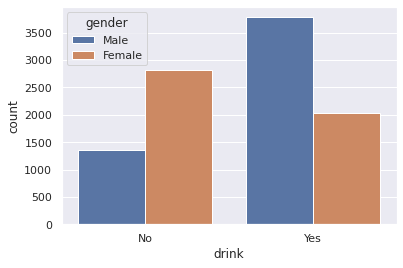

In [31]:
sns.countplot(data=hd2,x='drink', hue='gender')

=> 흡연자 남성이 흡연자 여성보다 2배 가까이 많으며, 비흡연자 여성이 비흡연자 남성보다 2배 가까이 많다.

## 2)AST와 ALT

In [34]:
hd2 = hd2.rename(columns={'(혈청지오티)AST':'AST'},)
hd2 = hd2.rename(columns={'(혈청지오티)ALT':'ALT'},)

In [37]:
print(hd2['ALT'].min())
print(hd2['ALT'].max())
print(hd2['AST'].min())
print(hd2['AST'].max())

2.0
1146.0
3.0
692.0


In [39]:
print(hd2['ALT'].describe())
print("")
print(hd2['AST'].describe())

count    9997.000000
mean       26.793218
std        23.633683
min         2.000000
25%        16.000000
50%        21.000000
75%        31.000000
max      1146.000000
Name: ALT, dtype: float64

count    9997.000000
mean       27.592391
std        17.807507
min         3.000000
25%        20.000000
50%        24.000000
75%        30.000000
max       692.000000
Name: AST, dtype: float64


[(2.0, 600.0), (3.0, 500.0)]

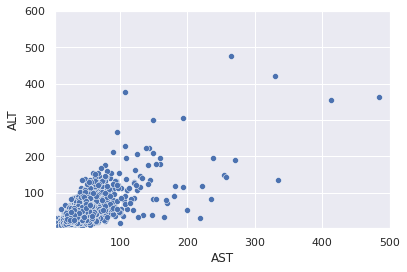

In [40]:
sns.scatterplot(data = hd2, x = 'AST', y = 'ALT').set(xlim = (3, 500), ylim = (2, 600))

=> 우상향하는 그래프로, AST가 높으면 ALT도 높은 경향을 보임을 알 수 있다.

## 3)음주여부-허리둘레-성별 간 관계

In [68]:
hd2 = hd2.rename(columns={'허리둘레':'WAIST'},)

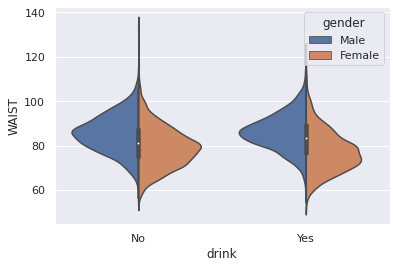

In [78]:
ax = plt.subplots()
ax = sns.violinplot(data=hd2, x='drink',y='WAIST', hue='gender',split=True)

=> 음주를 하는 사람일수록 허리둘레가 클 것이라 추정했으나, 그래프를 그려 본 결과 예상과 달리 둘 사이에 큰 상관관계는 없는 것으로 추정된다. 오히려 음주를 하지 않는 집단의 바이올린 꼬리가 더 긴 것으로 보아, 음주하지 않는 집단 중 허리둘레가 매우 큰 사람(이상치)가 음주하는 집단보다 더 많은 것으로 파악된다.